In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# All Breweries file
all_breweries = "brew_project/breweries/AllBreweries.csv"
all_breweriesdf= pd.read_csv(all_breweries) 
all_breweriesdf.head()


,id,name,nameDisplay,abv,isRetired,createDate,updateDate,style.category.name,style.category.createDate,style.name,...,style.ogMax,ibu,available.name,available.description,Brewery,year,style.category.description,style.category.updateDate,Average ABV,Average IBU
0,rf3USP,21A IPA,21A IPA,7.2,N,2012-01-03 02:42:37,2012-03-22 13:04:57,North American Origin Ales,2012-03-21 20:06:45,American-Style India Pale Ale,...,NaN,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
1,DTJaHy,5 South,5 South,NaN,N,2017-02-21 09:19:08,2017-05-04 15:35:24,North American Origin Ales,2012-03-21 20:06:45,American-Style Pale Ale,...,NaN,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
2,6IV6lH,563 Stout,563 Stout,5.0,N,2012-01-03 02:42:37,2014-10-13 18:54:48,North American Origin Ales,2012-03-21 20:06:45,American-Style Stout,...,NaN,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
3,2qPP4k,A Terrible Idea,A Terrible Idea,NaN,N,2018-09-05 17:18:08,2018-09-06 05:00:08,North American Origin Ales,2012-03-21 20:06:45,Juicy or Hazy India Pale Ale,...,1.07,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
4,8PgW0r,Allies Win The War!,Allies Win The War!,8.5,N,2012-09-09 21:41:10,2015-12-16 17:57:10,British Origin Ales,2012-03-21 20:06:45,Strong Ale,...,NaN,52.0,Limited,Limited availability.,21st Amendment,NaN,NaN,NaN,NaN,NaN


In [3]:
data_points = all_breweriesdf.groupby(["Brewery"]).count()['name'].sort_values(ascending=False)
data_points

Brewery
Stone Brewing                317
Sierra Nevada Brewing Co.    305
Boston Beer Company          193
Lagunitas Brewing Company    104
Anheuser-Busch InBev          94
Anchor Brewing Company        56
21st Amendment                56
Coors Brewing Company         39
Track 7 Brewing Company       35
Grupo Modelo(Corona)          19
Heineken                      16
Miller Brewing Company        11
CCM(Tecate)                   11
White Claw Hard Seltzer        8
Name: name, dtype: int64

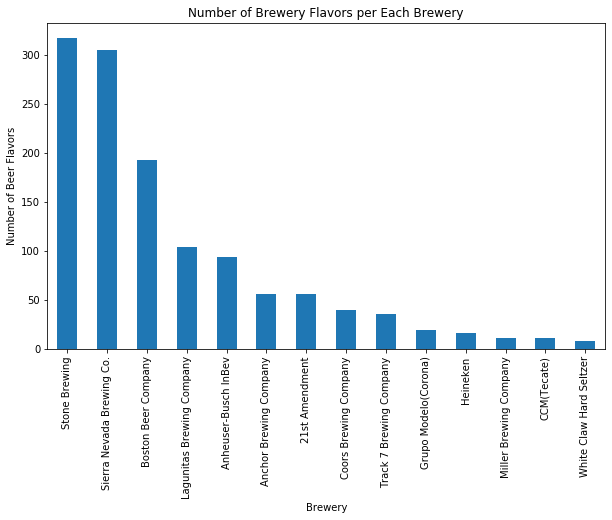

<Figure size 432x288 with 0 Axes>

In [4]:
data_points.plot(kind="bar", figsize=(10,6))

plt.title('Number of Brewery Flavors per Each Brewery')
plt.xlabel('Brewery')
plt.ylabel('Number of Beer Flavors')
plt.show()
plt.tight_layout()


In [5]:
brewery_df = all_breweriesdf.groupby(['Brewery'])

abvMax_mean = brewery_df['style.abvMax'].mean()
ibuMax_mean = brewery_df['style.ibuMax'].mean()


In [6]:
summary_stats = pd.DataFrame({'AbvMax Mean': abvMax_mean, 'IbuMax Mean': ibuMax_mean})
summary_stats


,AbvMax Mean,IbuMax Mean
Brewery,,
21st Amendment,8.547170,55.283019
Anchor Brewing Company,12.136364,67.527273
Anheuser-Busch InBev,8.122222,36.202703
Boston Beer Company,8.301136,47.906977
CCM(Tecate),5.690909,24.545455
Coors Brewing Company,6.194595,25.500000
Grupo Modelo(Corona),9.922222,43.733333
Heineken,5.606667,23.000000
Lagunitas Brewing Company,9.317978,62.842697


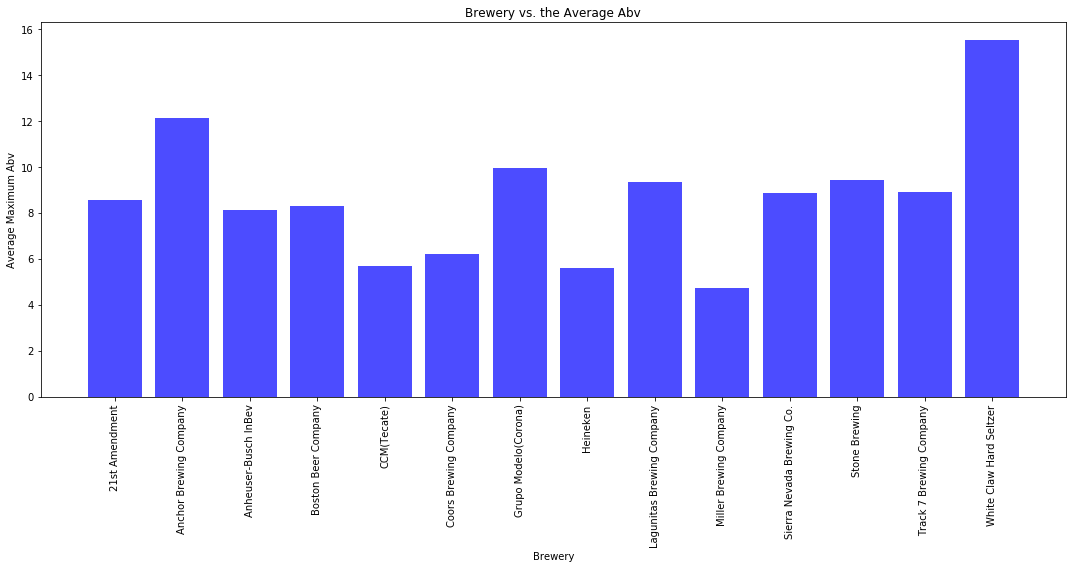

In [7]:
numofpoints=summary_stats["AbvMax Mean"]
x_axis = np.arange(len(numofpoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ["21st Amendment", "Anchor Brewing Company", "Anheuser-Busch InBev", "Boston Beer Company",
                           "CCM(Tecate)", "Coors Brewing Company", "Grupo Modelo(Corona)", "Heineken", "Lagunitas Brewing Company",
                           "Miller Brewing Company", "Sierra Nevada Brewing Co.", "Stone Brewing", "Track 7 Brewing Company", "White Claw Hard Seltzer"], rotation='vertical')
plt.title('Brewery vs. the Average Abv')
plt.xlabel('Brewery')
plt.ylabel('Average Maximum Abv')
plt.tight_layout()
plt.show()

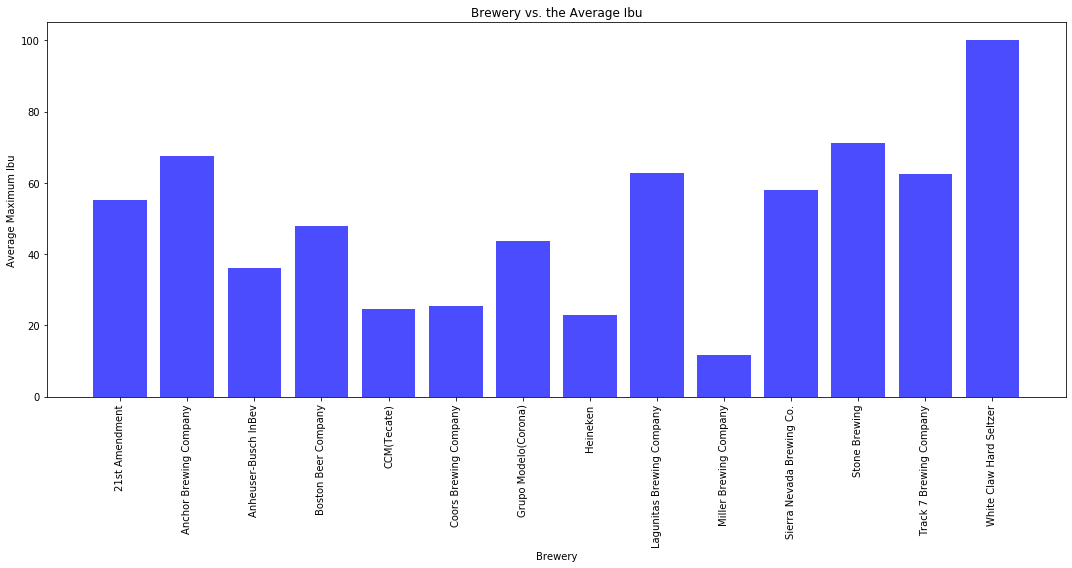

In [8]:
numofpoints=summary_stats["IbuMax Mean"]
x_axis = np.arange(len(numofpoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ["21st Amendment", "Anchor Brewing Company", "Anheuser-Busch InBev", "Boston Beer Company",
                           "CCM(Tecate)", "Coors Brewing Company", "Grupo Modelo(Corona)", "Heineken", "Lagunitas Brewing Company",
                           "Miller Brewing Company", "Sierra Nevada Brewing Co.", "Stone Brewing", "Track 7 Brewing Company", "White Claw Hard Seltzer"], rotation='vertical')
plt.title('Brewery vs. the Average Ibu')
plt.xlabel('Brewery')
plt.ylabel('Average Maximum Ibu')
plt.tight_layout()
plt.show()

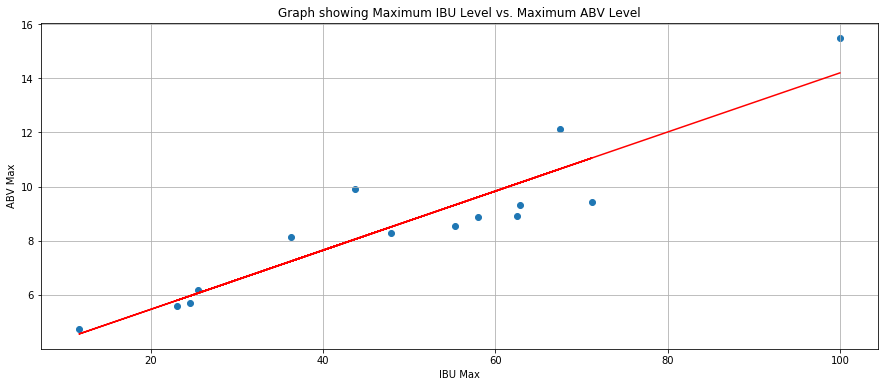

y =0.11x + 3.29
R2 is: 0.8602941227694979


In [9]:
#Scatter Plots
x_values = summary_stats["IbuMax Mean"]
y_values = summary_stats["AbvMax Mean"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,6))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("IBU Max")
plt.ylabel("ABV Max")
plt.title("Graph showing Maximum IBU Level vs. Maximum ABV Level")
plt.grid()
plt.show()
print(line_eq)
print(f"R2 is: {rvalue**2}")

In [10]:
# looking at top 4 data

collectn_1 = summary_stats['AbvMax Mean'][1]
collectn_2 = summary_stats['AbvMax Mean'][11]
collectn_3 = summary_stats['AbvMax Mean'][6]
collectn_4 = summary_stats['AbvMax Mean'][13]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
data_to_plot

[12.136363636363638, 9.438283828382838, 9.922222222222224, 15.5]

[Text(0, 0, 'Sample1')]

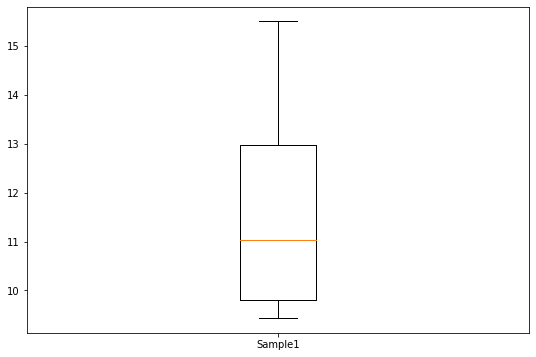

In [11]:
fig = plt.figure(2, figsize=(9,6))

ax = fig.add_subplot(111)


bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])

In [12]:
# looking at top 4 data

collectn_1 = summary_stats['AbvMax Mean'][1]
collectn_2 = summary_stats['AbvMax Mean'][11]
collectn_3 = summary_stats['AbvMax Mean'][6]
collectn_4 = summary_stats['AbvMax Mean'][13]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
data_to_plot

[12.136363636363638, 9.438283828382838, 9.922222222222224, 15.5]

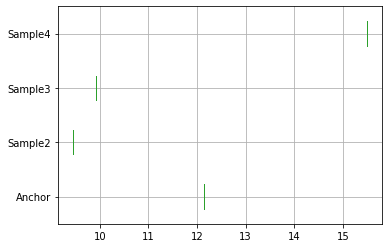

In [13]:
df = pd.DataFrame(data_to_plot, index=['Anchor', 'Sample2', 'Sample3', 'Sample4'])
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.15)
plt.show()

In [14]:
best_breweries = all_breweriesdf[all_breweriesdf['Brewery'].isin(["White Claw Hard Seltzer", "Stone Brewing", "Anchor Brewing Company", "Grupo Modelo(Corona)"])]
best_breweries
best_breweries_data = best_breweries[["Brewery", "name", "abv"]]
best_breweries_data
best_breweries_sort = best_breweries_data.groupby(['Brewery', 'name']).last()['abv']
#best_breweries_sort.head()

/opt/anaconda3/envs/PythonDataViz/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/anaconda3/envs/PythonDataViz/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/anaconda3/envs/PythonDataViz/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/anaconda3/envs/PythonDataViz/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


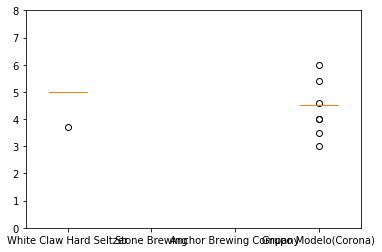

In [15]:
top_4 = ["White Claw Hard Seltzer", "Stone Brewing", "Anchor Brewing Company", "Grupo Modelo(Corona)"]

final_df = best_breweries_sort.reset_index()
breweries_lists = final_df.groupby('Brewery')['abv'].apply(list)
#final_df
breweries_list_df = pd.DataFrame(breweries_lists)
breweries_list_df = breweries_list_df.reindex(top_4)
abv = [abv for abv in breweries_list_df['abv']]

plt.boxplot(abv, labels=top_4)
plt.ylim(0,8)
plt.show()
